# Learning objectives

1. Understand geospatial data in Python
2. Download map of USA and plot it; do the same thing with States and California counties
3. Learn how to join population data with the spatial-geometric data

In [1]:
# In case you haven't installed the libraries yet, uncomment the following:

#!pip install geopandas 
#!pip install mapclassify
#!pip install descartes

In [2]:
import os

import pandas as pd
import geopandas as gpd

import matplotlib
%matplotlib inline

# Introduction to geospatial data in Python

"[GeoPandas](https://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. `geopandas` further depends on `fiona` for file access and `descartes` and `matplotlib` for plotting."

![geo1](../../Img/Geo1.png)

![geo2](../../Img/Geo2.png)

![geo3](../../Img/Geo3.png)

![geo4](../../Img/Geo4.png)

![geo5](../../Img/Geo5.png)

![geo6](../../Img/Geo6.png)

![geo7](../../Img/Geo7.png)

![geo8](../../Img/Geo8.png)

![geo9](../../Img/Geo9.png)

![geo10](../../Img/Geo10.png)

![geo11](../../Img/Geo11.png)

![geo12](../../Img/Geo12.png)

# DIVA (Data-Interpolating Variational Analysis)

[DIVA-GIS](https://www.diva-gis.org/gdata) is an excellent website for downloading free geographic (GIS) data for any country in the world. The [DIVA-GIS software manual](https://www.diva-gis.org/docs/DIVA-GIS_manual_7.pdf) is worth a read as well. 

### USA example
1. Create a folder named USA (or whatever country/state/region you are working with) in your DIGHUM101-2019 directory (this has already been done for you)
2. Visit [DIVA-GIS](https://www.diva-gis.org/gdata) and select "United States" from the "Country" dropdown menu
3. Select "Administrative Areas" from the "Subject" dropdown menu
4. Click "OK"
5. Click "Download"

In [3]:
# Check the working directory

%pwd

'/Users/tomvannuenen/Documents/GitHub/DIGHUM101-2022/Notebooks/Week3'

In [4]:
# Read in the data as a GeoDataFrame
# Note the format for reading a zip file.

usa = gpd.read_file("USA_adm.zip")
print(type(usa))
usa

<class 'geopandas.geodataframe.GeoDataFrame'>


,ID_0,ISO,NAME_0,OBJECTID_1,ISO3,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,244,USA,United States,238,USA,United States,UNITED STATES,United States of America,United States,None,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-155.84998 20.26800, -155.8494..."


In [5]:
usa.columns

Index(['ID_0', 'ISO', 'NAME_0', 'OBJECTID_1', 'ISO3', 'NAME_ENGLI', 'NAME_ISO',
       'NAME_FAO', 'NAME_LOCAL', 'NAME_OBSOL', 'NAME_VARIA', 'NAME_NONLA',
       'NAME_FRENC', 'NAME_SPANI', 'NAME_RUSSI', 'NAME_ARABI', 'NAME_CHINE',
       'WASPARTOF', 'CONTAINS', 'SOVEREIGN', 'ISO2', 'WWW', 'FIPS', 'ISON',
       'VALIDFR', 'VALIDTO', 'POP2000', 'SQKM', 'POPSQKM', 'UNREGION1',
       'UNREGION2', 'DEVELOPING', 'CIS', 'Transition', 'OECD', 'WBREGION',
       'WBINCOME', 'WBDEBT', 'WBOTHER', 'CEEAC', 'CEMAC', 'CEPLG', 'COMESA',
       'EAC', 'ECOWAS', 'IGAD', 'IOC', 'MRU', 'SACU', 'UEMOA', 'UMA', 'PALOP',
       'PARTA', 'CACM', 'EurAsEC', 'Agadir', 'SAARC', 'ASEAN', 'NAFTA', 'GCC',
       'CSN', 'CARICOM', 'EU', 'CAN', 'ACP', 'Landlocked', 'AOSIS', 'SIDS',
       'Islands', 'LDC', 'geometry'],
      dtype='object')

In [6]:
usa.dtypes

ID_0             int64
ISO             object
NAME_0          object
OBJECTID_1       int64
ISO3            object
                ...   
AOSIS          float64
SIDS           float64
Islands        float64
LDC            float64
geometry      geometry
Length: 71, dtype: object

Note the "geometry" datatype above, which is what makes this a geopandas dataframe.

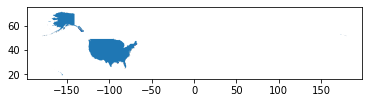

In [7]:
# Plot it!
usa.plot();

# State boundaries

Now we need to get the state boundaries to overlay on this map.

In [8]:
# Read the file

state_boundaries = gpd.read_file("../../Data/Geo/us_states.zip")
print(state_boundaries.shape)
state_boundaries.head()

(56, 4)


,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [9]:
app_states = ["KY", "VA", "TN", "WV"]

In [10]:
app_states_df = state_boundaries.loc[state_boundaries["ABBREV"].isin(["KY", "VA", "TN", "WV"])]
app_states_df

,STATE,GEOID,ABBREV,geometry
30,West Virginia,54,WV,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
35,Kentucky,21,KY,"MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ..."
48,Tennessee,47,TN,"POLYGON ((-90.31030 35.00429, -90.30988 35.009..."
50,Virginia,51,VA,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."


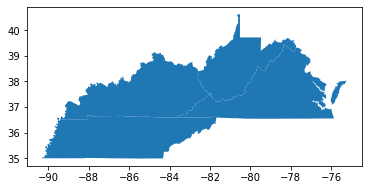

In [11]:
app_states_df.plot();

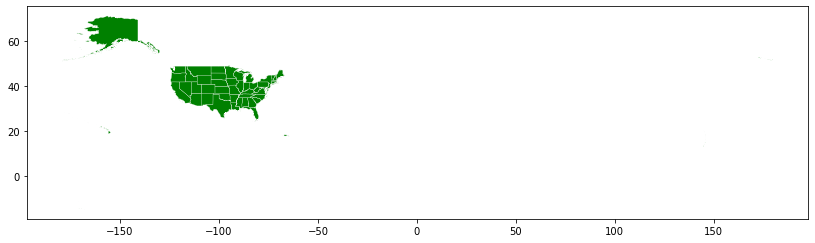

In [12]:
# Plot the state boundaries
state_boundaries.plot(
    
    # Width of boundary line
    linewidth=0.25, 
    
    # Boundary color line
    edgecolor='white', 
    
    # State color
    facecolor='green',
    
    # Figure size
    figsize=(14,10)
);

In [13]:
state_boundaries.cx?

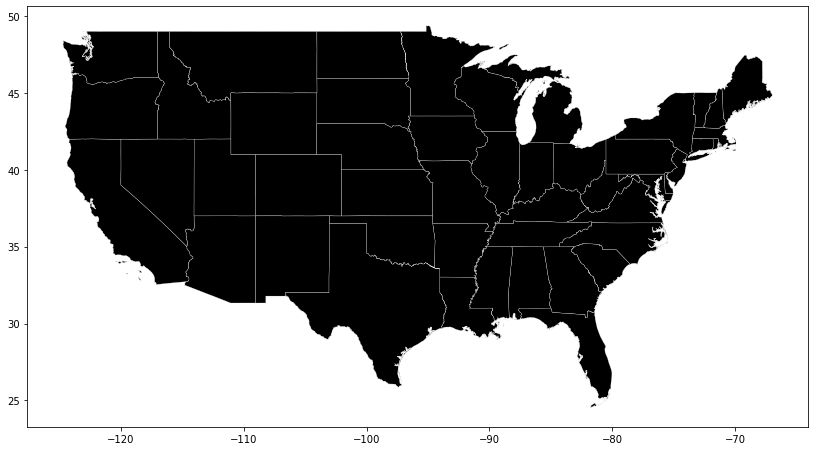

In [14]:
# Spatial subset of the contiguous US (zoom in!)
state_boundaries.cx[-130:-70,25:50].plot(linewidth=0.25, 
                                         edgecolor='white', 
                                         facecolor='black', 
                                         figsize=(14,10));

# Individual county polygons

To get individual state county boundaries, visit https://www.census.gov/geographies/mapping-files/2018/geo/carto-boundary-file.html

We want the file "cb_2018_us_county_5m.zip" What is California's STATEFP code? 

In [15]:
counties = gpd.read_file("zip://../../Data/Geo/cb_2018_us_county_5m.zip")
print(counties.shape)
counties.head()

(3233, 10)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,071,01074048,0500000US39071,39071,Highland,06,1432479992,12194983,"POLYGON ((-83.86976 39.05553, -83.86568 39.247..."
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
2,12,033,00295737,0500000US12033,12033,Escambia,06,1701544502,563927612,"POLYGON ((-87.62999 30.87766, -87.62946 30.880..."
3,17,101,00424252,0500000US17101,17101,Lawrence,06,963936864,5077783,"POLYGON ((-87.91028 38.57493, -87.90811 38.850..."
4,28,153,00695797,0500000US28153,28153,Wayne,06,2099745573,7255476,"POLYGON ((-88.94317 31.78421, -88.94335 31.824..."


In [16]:
# Just California...
cal_counties = counties.loc[counties["STATEFP"] == "06"]
print(cal_counties.shape)
cal_counties.head()

(58, 10)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
1,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7..."
21,06,109,00277319,0500000US06109,06109,Tuolumne,06,5752079372,138722707,"POLYGON ((-120.65255 37.83346, -120.64407 37.8..."
51,06,103,01692767,0500000US06103,06103,Tehama,06,7638228750,33767783,"POLYGON ((-123.05927 40.28548, -123.04970 40.2..."
52,06,105,00277317,0500000US06105,06105,Trinity,06,8234265085,73407950,"POLYGON ((-123.61749 40.93114, -123.60956 40.9..."
114,06,069,00277299,0500000US06069,06069,San Benito,06,3596590995,4719296,"POLYGON ((-121.64400 36.89400, -121.62946 36.9..."


In [17]:
# Pull the state info for California
state_boundaries.head()

,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [18]:
# Subset to California

california = state_boundaries.loc[state_boundaries["ABBREV"] == "CA"]
california

,STATE,GEOID,ABBREV,geometry
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


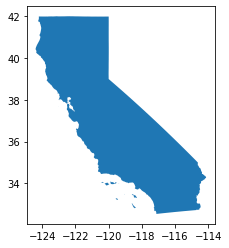

In [19]:
# Plot it
california.plot(); 

Let's bring in some more information about these counties, such as the population, the housing units, density, and so on. These data come from the Census Bureau. Visit the [Census Bureau website](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-counties-total.html) to get more information about these counties. 

In [20]:
pop = pd.read_csv("../../Data/Geo/DEC_10_SF1_GCTPH1.ST05_with_ann.csv")
print(pop.shape)
pop.head()

(58, 14)


,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic area,Geographic area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
0,0400000US06,6,California,0500000US06001,6001,California - Alameda County,Alameda County,1510271,582549,821.33,82.31,739.02,2043.6,788.3
1,0400000US06,6,California,0500000US06003,6003,California - Alpine County,Alpine County,1175,1760,743.18,4.85,738.33,1.6,2.4
2,0400000US06,6,California,0500000US06005,6005,California - Amador County,Amador County,38091,18032,605.96,11.37,594.58,64.1,30.3
3,0400000US06,6,California,0500000US06007,6007,California - Butte County,Butte County,220000,95835,1677.13,40.67,1636.46,134.4,58.6
4,0400000US06,6,California,0500000US06009,6009,California - Calaveras County,Calaveras County,45578,27925,1036.93,16.92,1020.01,44.7,27.4


Note that this is not geospatial data (it does not have coordinates in the "Geography" column). 
We need to use  "Target Geo Id2" column to match the other dataset later. However, to do so we need to add a 0 to each row in this column first (so it matches the "GEOID" column in our `cal_countries` geodataframe.

In [21]:
# Add a zero to the new GEOID column
pop["GEOID"] = ["0" + str(x) for x in pop["Target Geo Id2"]]
pop.head()

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Geographic area,Geographic area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units,GEOID
0,0400000US06,6,California,0500000US06001,6001,California - Alameda County,Alameda County,1510271,582549,821.33,82.31,739.02,2043.6,788.3,06001
1,0400000US06,6,California,0500000US06003,6003,California - Alpine County,Alpine County,1175,1760,743.18,4.85,738.33,1.6,2.4,06003
2,0400000US06,6,California,0500000US06005,6005,California - Amador County,Amador County,38091,18032,605.96,11.37,594.58,64.1,30.3,06005
3,0400000US06,6,California,0500000US06007,6007,California - Butte County,Butte County,220000,95835,1677.13,40.67,1636.46,134.4,58.6,06007
4,0400000US06,6,California,0500000US06009,6009,California - Calaveras County,Calaveras County,45578,27925,1036.93,16.92,1020.01,44.7,27.4,06009


# Do the join!

Now we can combine `cal_counties` and `pop` because they have the same number of rows. We use the `.merge()` method from pandas, similar to what we would do in SQL. 

In this case, we use the "GEOID" column to do an "inner join" of these dataframes. This only keep rows where the merge `on` value (in our case, values in the "GEOID" column) exists in both the left and right dataframes. (Note we could have also done another type of join as we expect all values in "GEOID" to be present). 

If you want to read more about joining dataframes, check out [this post](https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/) and the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

![join](../../Img/join-types-merge-names.jpeg)

In [22]:
geo_pop = pd.merge(cal_counties, pop, on = "GEOID", how = "inner")
print(geo_pop.shape)
geo_pop.head()

(58, 24)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Target Geo Id2,Geographic area,Geographic area.1,Population,Housing units,Area in square miles - Total area,Area in square miles - Water area,Area in square miles - Land area,Density per square mile of land area - Population,Density per square mile of land area - Housing units
0,06,003,01675840,0500000US06003,06003,Alpine,06,1912292630,12557304,"POLYGON ((-120.07248 38.50987, -120.07239 38.7...",...,6003,California - Alpine County,Alpine County,1175,1760,743.18,4.85,738.33,1.6,2.4
1,06,109,00277319,0500000US06109,06109,Tuolumne,06,5752079372,138722707,"POLYGON ((-120.65255 37.83346, -120.64407 37.8...",...,6109,California - Tuolumne County,Tuolumne County,55365,31244,2274.43,53.55,2220.88,24.9,14.1
2,06,103,01692767,0500000US06103,06103,Tehama,06,7638228750,33767783,"POLYGON ((-123.05927 40.28548, -123.04970 40.2...",...,6103,California - Tehama County,Tehama County,63463,26987,2962.17,12.46,2949.71,21.5,9.1
3,06,105,00277317,0500000US06105,06105,Trinity,06,8234265085,73407950,"POLYGON ((-123.61749 40.93114, -123.60956 40.9...",...,6105,California - Trinity County,Trinity County,13786,8681,3207.60,28.34,3179.25,4.3,2.7
4,06,069,00277299,0500000US06069,06069,San Benito,06,3596590995,4719296,"POLYGON ((-121.64400 36.89400, -121.62946 36.9...",...,6069,California - San Benito County,San Benito County,55269,17870,1390.47,1.76,1388.71,39.8,12.9


Note that we now have 24 columns for each row (the combined 10 and 15 columns of our previous 2 dataframes, with the "GEOID" column only counting as 1).

# Plot

Finally, we can plot this new dataframe, making use of the fact we have this census data!

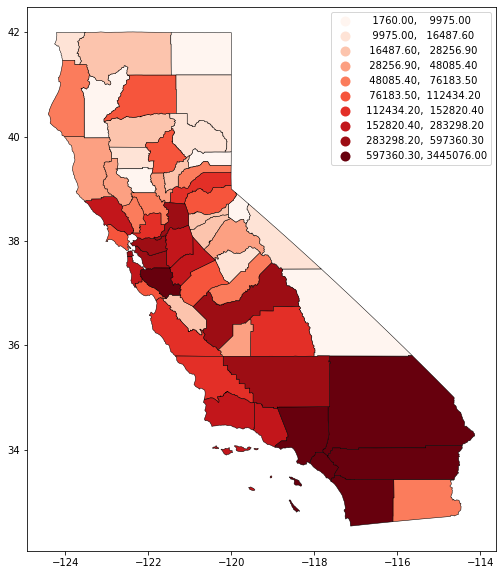

In [23]:
geo_pop.plot(
    # Which column to visualize?
    column = "Housing units", 
    
    # Which color palette to use?
    cmap = "Reds", 
    
    # What color should be used to separate the counties?
    edgecolor = "black", 
    
    # Width of the county boundary lines
    linewidth = 0.5, 
    
    # Change figure size
    figsize = (10, 10),
    
    # Add legend
    legend = True,
    
    # What do the different classifier schemes do? 
    scheme = "quantiles",
    k = 10
);

The `scheme` attribute above is especially noteworthy. This is a classification scheme that decides how we color-code our data.

Visit the [this page](https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html) and pass in different schemes. For instance, how does `scheme = "Equal_Interval"` differ from "quantiles"? 

> By the way: This is how people [lie with maps](https://www.amazon.com/How-Lie-Maps-Mark-Monmonier/dp/0226534219)! 

Let's make one more map, this time using the population density.

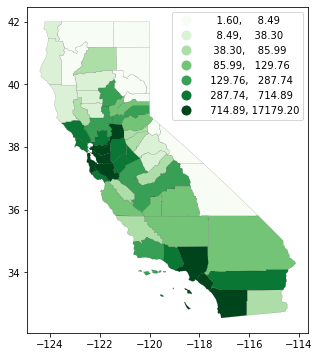

In [24]:
geo_pop.plot(column = "Density per square mile of land area - Population", 
             cmap = "Greens", 
             edgecolor = "black", 
             linewidth = 0.1, 
             scheme = "Quantiles", 
             legend = True, 
             figsize = (6,6),
             k = 7   # if you want to change the number of classes
            );

# Going further

Much of the information in this notebook came from the [Geospatial Fundamentals in Python](https://github.com/dlab-berkeley/Geospatial-Fundamentals-in-Python) workshop. If you want to learn more, have a look!
